# Credit Risk Modeling (CRM) Project


## Library & Dataset preparation

In [2]:
# Importing of relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import pearsonr

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, log_loss, mean_squared_error, brier_score_loss


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, log_loss, mean_squared_error,
    brier_score_loss, confusion_matrix, classification_report
)

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

--------------------------------------------------------------------------

# Data Acquisition & Pre-preprocessing😎

In [ ]:
# # Column names from german.doc
# column_names = [
#     "checking_account", "duration", "credit_history", "purpose", "credit_amount",
#     "savings", "employment", "installment_rate", "personal_status_sex",
#     "guarantors", "residence_since", "property", "age", "installment_plans",
#     "housing", "existing_credits", "job", "people_liable", "telephone", "foreign_worker", "target"
# ]

# # Load the raw data file (ensure german.data is in current directory)
# df = pd.read_csv("german.data", sep=' ', header=None, names=column_names)

# # Mapping dictionaries based on german.doc
# value_maps = {
#     "checking_account": {
#         "A11": "< 0 DM", "A12": "0 <= ... < 200 DM", "A13": ">= 200 DM / salary assignment", "A14": "no checking account"
#     },
#     "credit_history": {
#         "A30": "no credits / all paid", "A31": "all paid at this bank",
#         "A32": "paid back till now", "A33": "delay in paying", "A34": "critical / other credits"
#     },
#     "purpose": {
#         "A40": "car (new)", "A41": "car (used)", "A42": "furniture/equipment", "A43": "radio/TV",
#         "A44": "domestic appliances", "A45": "repairs", "A46": "education", "A47": "vacation",
#         "A48": "retraining", "A49": "business", "A410": "others"
#     },
#     "savings": {
#         "A61": "< 100 DM", "A62": "100 <= ... < 500 DM", "A63": "500 <= ... < 1000 DM",
#         "A64": ">= 1000 DM", "A65": "unknown / no savings"
#     },
#     "employment": {
#         "A71": "unemployed", "A72": "< 1 year", "A73": "1 <= ... < 4 years",
#         "A74": "4 <= ... < 7 years", "A75": ">= 7 years"
#     },
#     "personal_status_sex": {
#         "A91": "male: divorced/separated", "A92": "female: div/sep/married", "A93": "male: single",
#         "A94": "male: married/widowed", "A95": "female: single"
#     },
#     "guarantors": {
#         "A101": "none", "A102": "co-applicant", "A103": "guarantor"
#     },
#     "property": {
#         "A121": "real estate", "A122": "building society / life insurance",
#         "A123": "car or other", "A124": "unknown / no property"
#     },
#     "installment_plans": {
#         "A141": "bank", "A142": "stores", "A143": "none"
#     },
#     "housing": {
#         "A151": "rent", "A152": "own", "A153": "for free"
#     },
#     "job": {
#         "A171": "unskilled non-resident", "A172": "unskilled resident",
#         "A173": "skilled", "A174": "management/self-employed"
#     },
#     "telephone": {
#         "A191": "none", "A192": "yes (registered)"
#     },
#     "foreign_worker": {
#         "A201": "yes", "A202": "no"
#     },
#     "target": {
#         1: "good", 2: "bad"
#     }
# }

# # Apply mappings to relevant columns
# for col, mapping in value_maps.items():
#     df[col] = df[col].map(mapping)

# # Save the cleaned dataset
# df.to_csv("german_clean.csv", index=False)
# print("✅ Cleaned dataset saved as 'german_clean.csv' with all columns mapped and preserved.")


✅ Cleaned dataset saved as 'german_clean.csv' with all columns mapped and preserved.


In [ ]:
# # Writing the new dataframe after mapping to current path
# german_df.to_csv("german_dataset.csv", index=False)

In [7]:
# Load dataset
df = pd.read_csv("german_clean.csv")

# Basic info
# Getting the columns and rows of the dataset
print(f"There are '{german_df.shape[0]}' rows and '{german_df.shape[1]}' columns in the datset")
print("---"*30)
print(df.dtypes)

(1000, 21)
------------------------------------------------------------------------------------------
checking_account       object
duration                int64
credit_history         object
purpose                object
credit_amount           int64
savings                object
employment             object
installment_rate        int64
personal_status_sex    object
guarantors             object
residence_since         int64
property               object
age                     int64
installment_plans      object
housing                object
existing_credits        int64
job                    object
people_liable           int64
telephone              object
foreign_worker         object
target                 object
dtype: object


In [8]:
# Checking the first few rows
df.head(5)



,checking_account,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status_sex,guarantors,...,property,age,installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,target
0,< 0 DM,6,critical / other credits,radio/TV,1169,unknown / no savings,>= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled,1,yes (registered),yes,good
1,0 <= ... < 200 DM,48,paid back till now,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,female: div/sep/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking account,12,critical / other credits,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,< 0 DM,42,paid back till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society / life insurance,45,none,for free,1,skilled,2,none,yes,good
4,< 0 DM,24,delay in paying,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
german_df.columns

Index(['checking_account', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment', 'installment_rate',
       'personal_status_sex', 'guarantors', 'residence_since', 'property',
       'age', 'installment_plans', 'housing', 'existing_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'target',
       'credit_rating'],
      dtype='object')

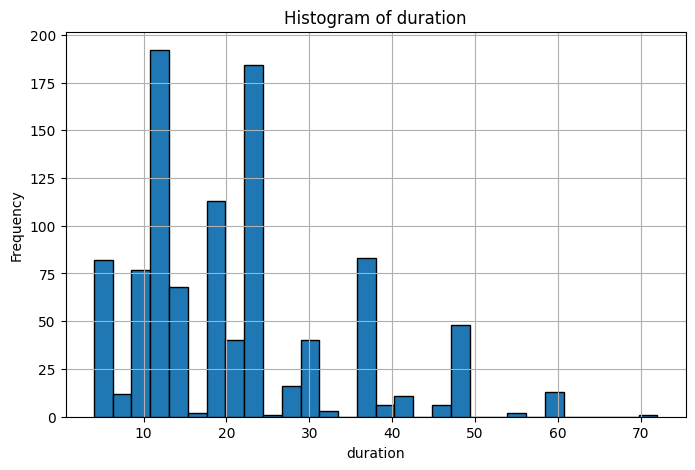

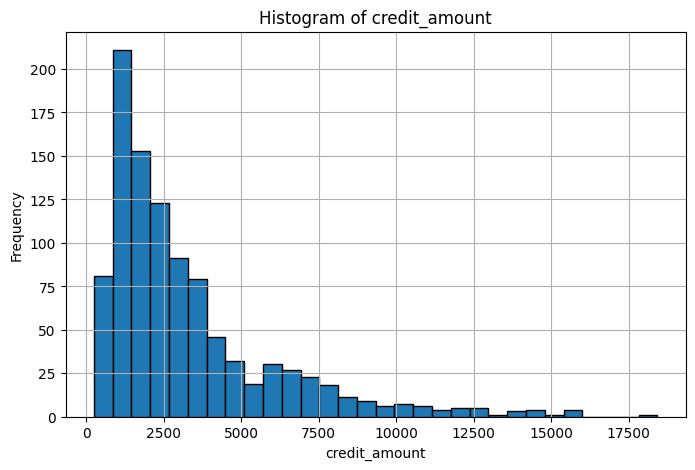

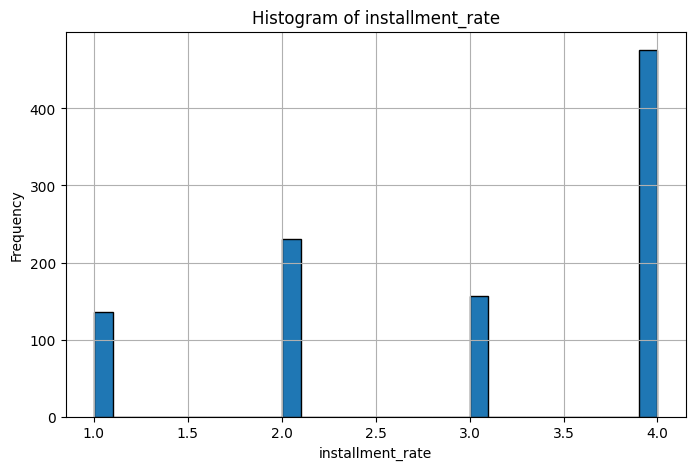

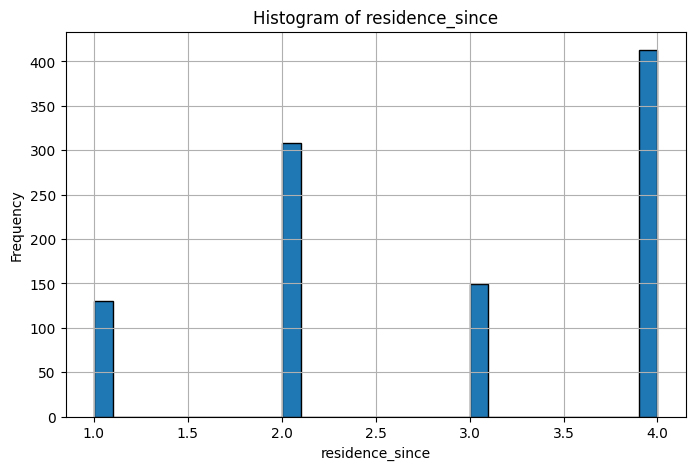

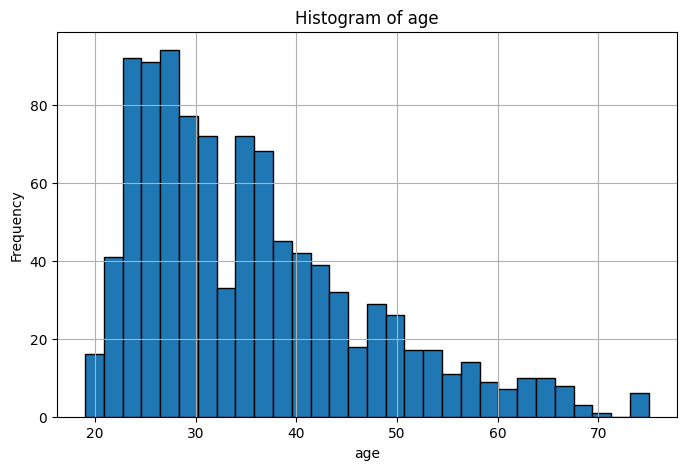

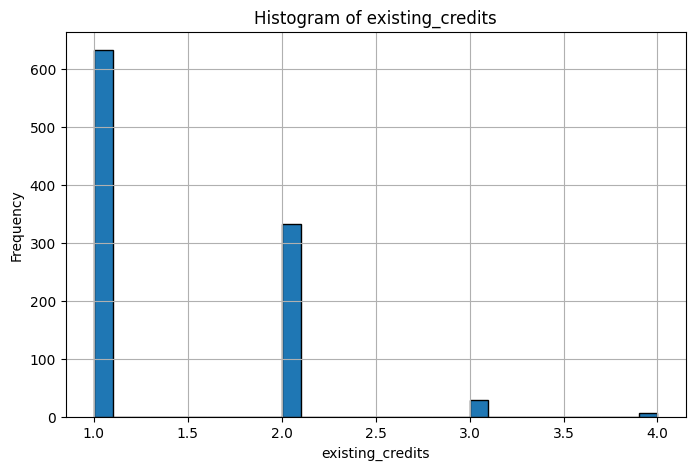

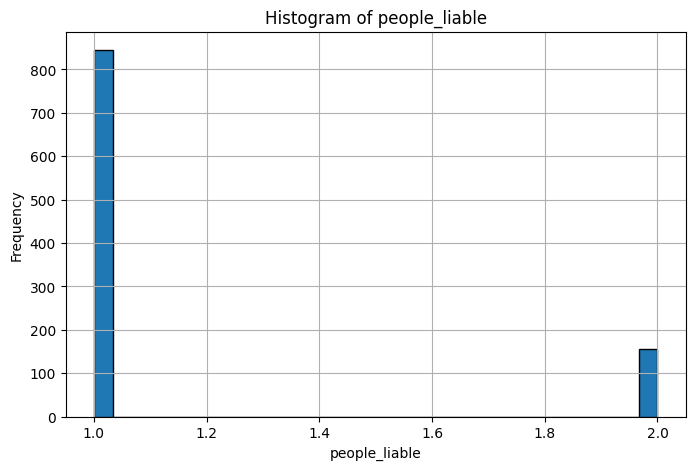

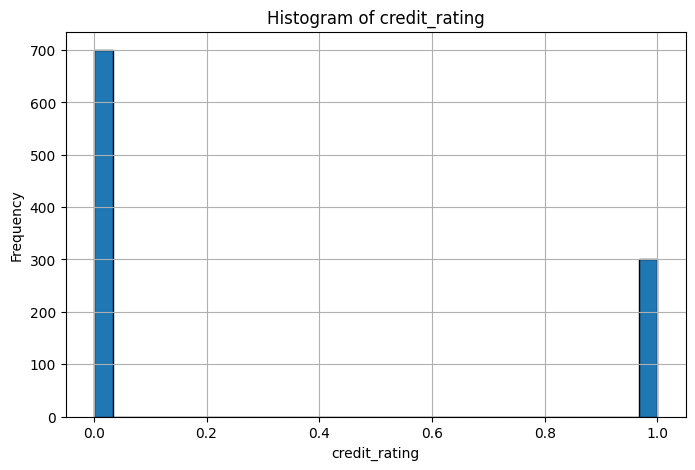

In [ ]:

# Pass the sorted order to countplot
# Load your dataset
df = pd.read_csv('german_dataset.csv')  # replace with your DataFrame or file path

# Loop through each numerical column
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
# Descriptive statistics
print(german_df.describe().T.to_markdown())

|                  |   count |     mean |         std |   min |    25% |    50% |     75% |   max |
|:-----------------|--------:|---------:|------------:|------:|-------:|-------:|--------:|------:|
| duration         |    1000 |   20.903 |   12.0588   |     4 |   12   |   18   |   24    |    72 |
| credit_amount    |    1000 | 3271.26  | 2822.74     |   250 | 1365.5 | 2319.5 | 3972.25 | 18424 |
| installment_rate |    1000 |    2.973 |    1.11871  |     1 |    2   |    3   |    4    |     4 |
| residence_since  |    1000 |    2.845 |    1.10372  |     1 |    2   |    3   |    4    |     4 |
| age              |    1000 |   35.546 |   11.3755   |    19 |   27   |   33   |   42    |    75 |
| existing_credits |    1000 |    1.407 |    0.577654 |     1 |    1   |    1   |    2    |     4 |
| people_liable    |    1000 |    1.155 |    0.362086 |     1 |    1   |    1   |    1    |     2 |
| credit_rating    |    1000 |    0.3   |    0.458487 |     0 |    0   |    0   |    1    |     1 |


In [9]:
# Checking the target column value counts for default(bad) and non-default(good)
print(df["target"].value_counts())

target
good    700
bad     300
Name: count, dtype: int64


# Data Preprocessing📊

In [ ]:
# Check for missing values
print(df.isnull().sum())


checking_account       0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings                0
employment             0
installment_rate       0
personal_status_sex    0
guarantors             0
residence_since        0
property               0
age                    0
installment_plans      0
housing                0
existing_credits       0
job                    0
people_liable          0
telephone              0
foreign_worker         0
target                 0
dtype: int64


In [ ]:
# Unique values in each column
print(df.nunique())

checking_account         4
duration                33
credit_history           5
purpose                 10
credit_amount          921
savings                  5
employment               5
installment_rate         4
personal_status_sex      4
guarantors               3
residence_since          4
property                 4
age                     53
installment_plans        3
housing                  3
existing_credits         4
job                      4
people_liable            2
telephone                2
foreign_worker           2
target                   2
dtype: int64


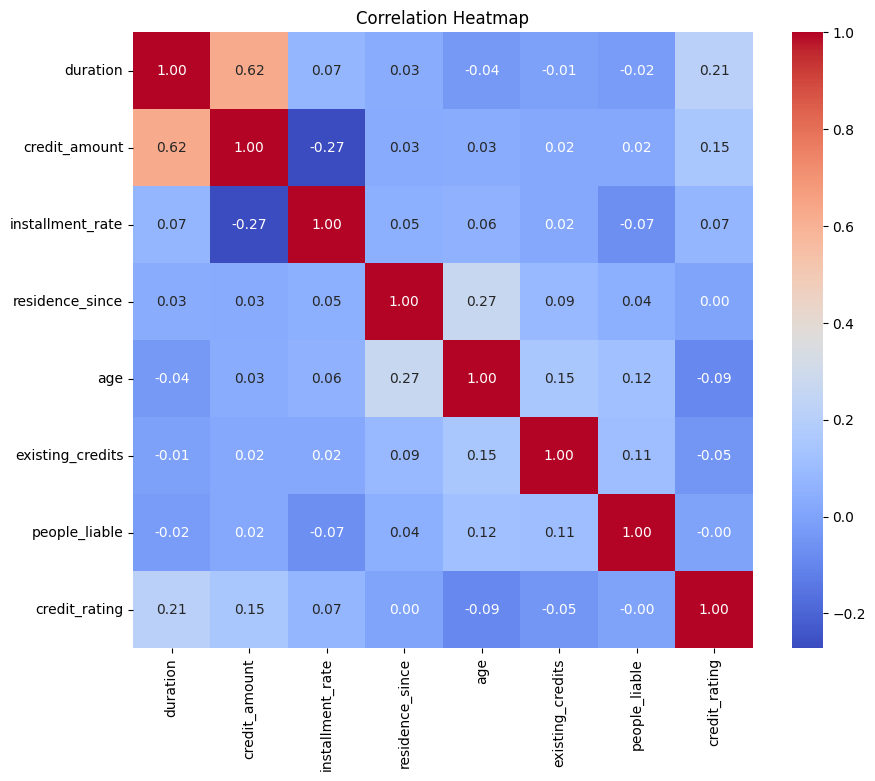

In [ ]:
# Showing a heatmap of the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

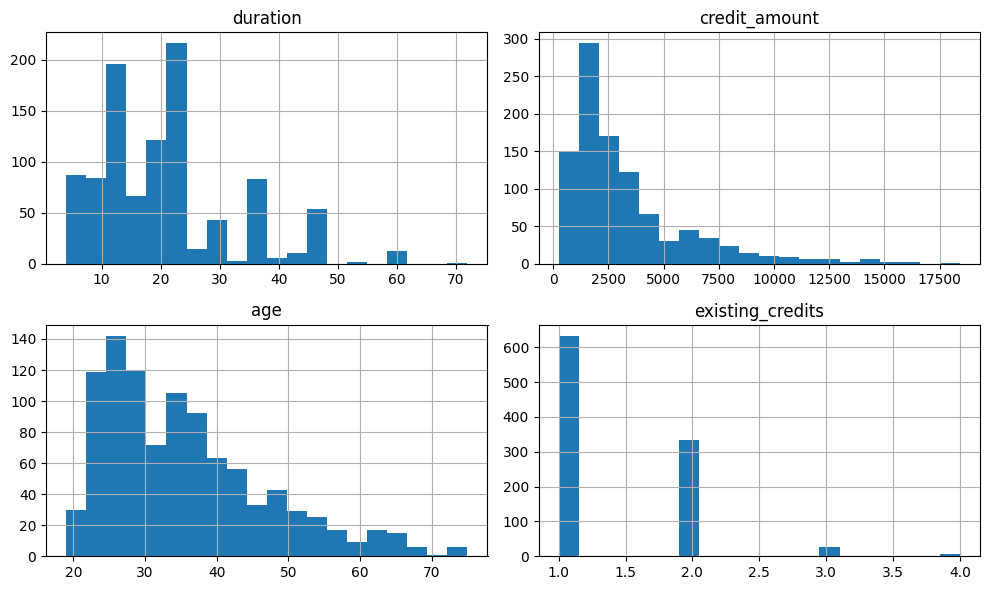

In [ ]:
# Numeric feature distributions
numeric_features = ["duration", "credit_amount", "age", "existing_credits"]
df[numeric_features].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()


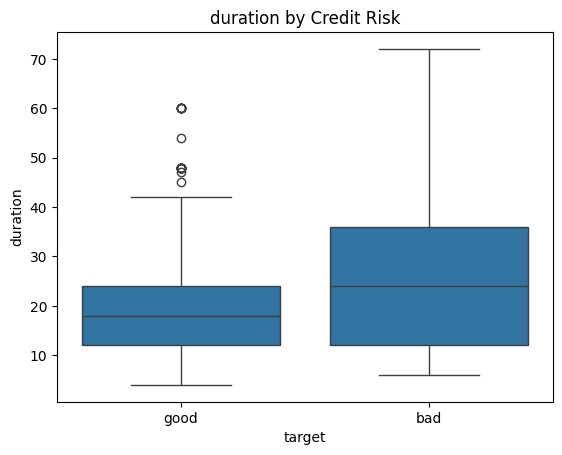

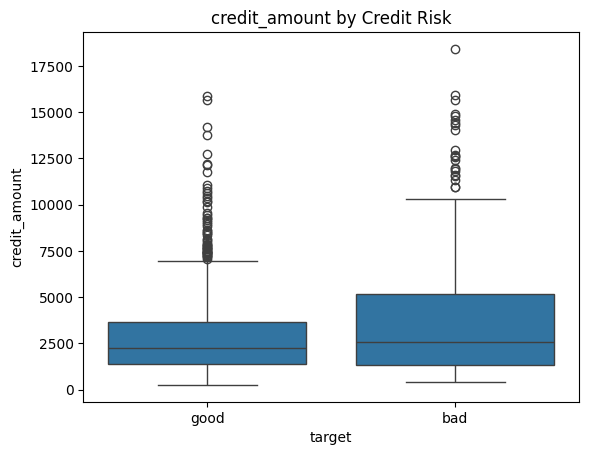

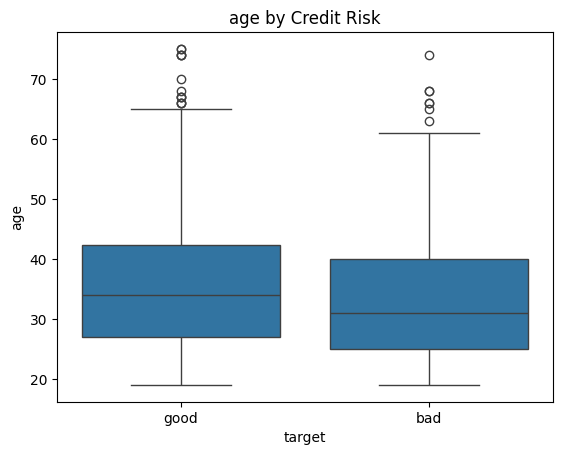

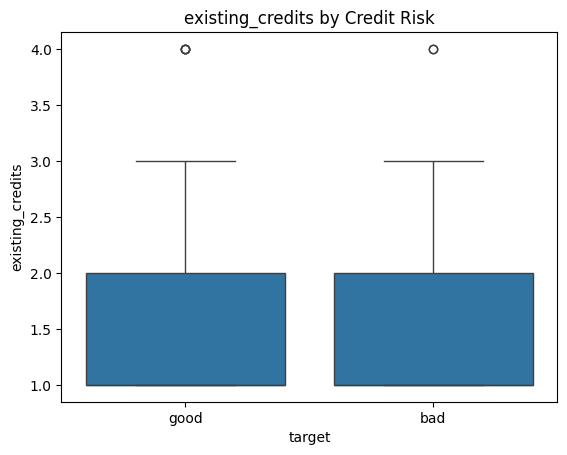

In [ ]:
# Boxplot by target
for col in numeric_features:
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} by Credit Risk")
    plt.show()


# Feature Selection📈

In [ ]:
#
df_model = pd.DataFrame()
df_model["term"] = df["duration"].astype(float)
df_model["age"] = df["age"].astype(float)
df_model["credit_cards"] = df["existing_credits"].astype(float)
df_model["salary"] = (df["checking_account"] == ">= 200 DM / salary assignment").astype(int)
df_model["tax_echelon"] = df["savings"].map({
    "< 100 DM": 1, "100 <= ... < 500 DM": 2, "500 <= ... < 1000 DM": 3,
    ">= 1000 DM": 4, "unknown / no savings": 5
}).astype(float)
df_model["age_credit_cards"] = df_model["age"] * df_model["credit_cards"]
df_model["default"] = (df["target"] == "bad").astype(int)

df_model.to_csv("german_model_features.csv", index=False)


In [ ]:
# Separate target
y = df_model["default"]

# Define features
categorical_features = ["salary"]  # binary
ordinal_features = ["tax_echelon"]
continuous_features = ["term", "age", "credit_cards", "age_credit_cards"]


In [ ]:
#
print("Chi-Square Test for Categorical Variables")
for col in categorical_features + ordinal_features:
    contingency_table = pd.crosstab(df_model[col], y)
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.2f}, p = {p:.4f}")


Chi-Square Test for Categorical Variables
salary: chi2 = 1.56, p = 0.2114
tax_echelon: chi2 = 36.10, p = 0.0000


In [ ]:
#
print("\nMann-Whitney U Test for Continuous Variables (non-parametric)")
for col in continuous_features:
    group1 = df_model[df_model["default"] == 0][col]
    group2 = df_model[df_model["default"] == 1][col]
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"{col}: U = {stat:.2f}, p = {p:.4f}")



Mann-Whitney U Test for Continuous Variables (non-parametric)
term: U = 77995.50, p = 0.0000
age: U = 119833.00, p = 0.0004
credit_cards: U = 110272.00, p = 0.1348
age_credit_cards: U = 118121.00, p = 0.0017


In [ ]:
#
print("\nT-Test for Continuous Variables (parametric)")
for col in continuous_features:
    group1 = df_model[df_model["default"] == 0][col]
    group2 = df_model[df_model["default"] == 1][col]
    stat, p = ttest_ind(group1, group2, equal_var=False)
    print(f"{col}: t = {stat:.2f}, p = {p:.4f}")



T-Test for Continuous Variables (parametric)
term: t = -6.47, p = 0.0000
age: t = 2.91, p = 0.0038
credit_cards: t = 1.47, p = 0.1416
age_credit_cards: t = 2.86, p = 0.0043


p < 0.05 → the feature likely differs across default groups → candidate for inclusion

Use Mann-Whitney when in doubt about normality

Use Chi-Square for categorical predictors (binary, ordinal)

| Feature         | Test            | Statistic       | p-value         | Effect Size     |
|----------------|-----------------|-----------------|------------------|-----------------|
| salary          | Chi-Square      | 1.561729874     | 0.211412113      |                 |
| tax_echelon     | Chi-Square      | 36.09892819     | 2.76E-07         |                 |
| term            | Mann-Whitney U  | 77995.5         | 7.98E-11         |                 |
| age             | Mann-Whitney U  | 119833          | 0.000391277      |                 |
| credit_cards    | Mann-Whitney U  | 110272          | 0.13481891       |                 |
| age_credit_cards| Mann-Whitney U  | 118121          | 0.001715582      |                 |
| term            | T-Test          | -6.469554346    | 2.40E-10         |                 |
| age             | T-Test          | 2.907152117     | 0.003788491      |                 |
| credit_cards    | T-Test          | 1.471786621     | 0.141612588      |                 |
| age_credit_cards| T-Test          | 2.864134935     | 0.004316533      |                 |


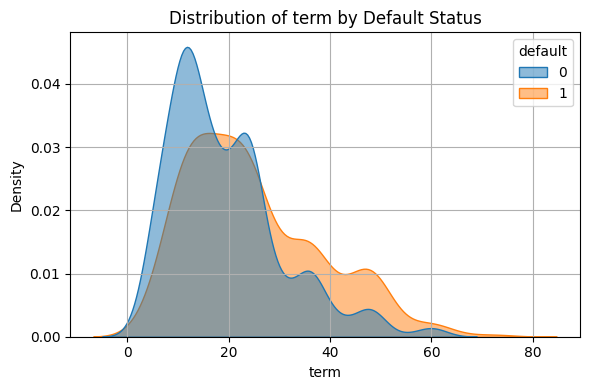

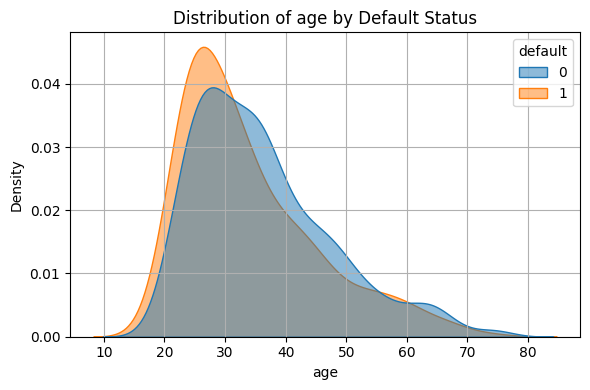

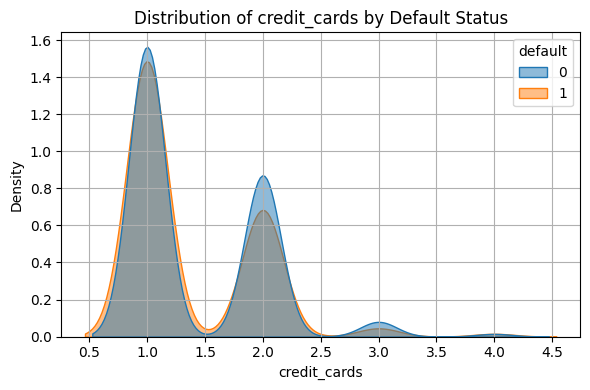

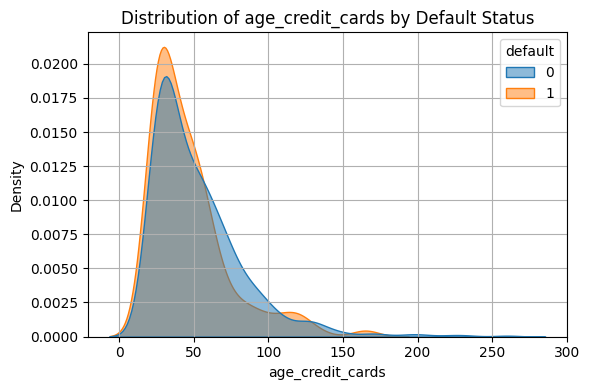

In [ ]:
# Plot distributions of continuous features split by default
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_model, x=col, hue="default", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {col} by Default Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Cohen's d quantifies how different two group means are (in standard deviations):

In [ ]:
#
def cohen_d(group1, group2):
    # Pooled standard deviation
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt((group1.std() ** 2 + group2.std() ** 2) / 2)
    return diff / pooled_std

print("\nCohen's d (effect size) between defaulted vs. non-defaulted:")
for col in continuous_features:
    group0 = df_model[df_model["default"] == 0][col]
    group1 = df_model[df_model["default"] == 1][col]
    d = cohen_d(group0, group1)
    print(f"{col}: Cohen's d = {d:.3f}")



Cohen's d (effect size) between defaulted vs. non-defaulted:
term: Cohen's d = -0.462
age: Cohen's d = 0.200
credit_cards: Cohen's d = 0.101
age_credit_cards: Cohen's d = 0.192



|d | Effect Size|
|---|---|
|0.2 | Small|
|0.5 | Medium|
|0.8 | Large|*

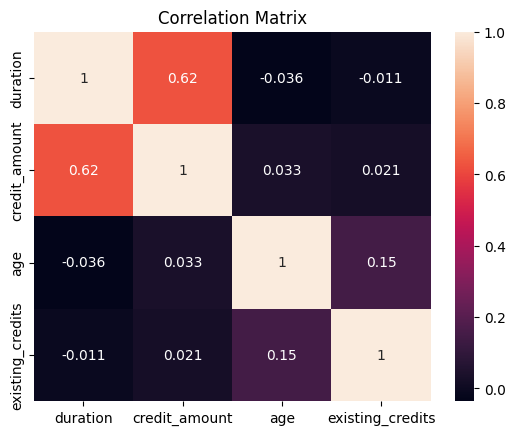

In [ ]:
# Correlation heatmap
sns.heatmap(df[numeric_features].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Define input features and target
X = df_model.drop(columns=["default"])  # features
y = df_model["default"]                 # target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: Check the size and balance
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Default rate in train:", y_train.mean())
print("Default rate in test:", y_test.mean())


Training set size: (800, 6)
Test set size: (200, 6)
Default rate in train: 0.3
Default rate in test: 0.3


# Model Training

## Logistic Regression

In [ ]:
# Add constant and fit model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test, has_constant='add')

logit_model = sm.Logit(y_train, X_train_sm)
logit_result = logit_model.fit()

# Predict
y_pred_logit_prob = logit_result.predict(X_test_sm)
y_pred_logit = (y_pred_logit_prob >= 0.5).astype(int)

# Summary Table
print(logit_result.summary2())

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logit))
print("Classification Report:\n", classification_report(y_test, y_pred_logit))
print("AUC:", roc_auc_score(y_test, y_pred_logit_prob))
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print("Log Loss:", log_loss(y_test, y_pred_logit_prob))
print("MSE:", mean_squared_error(y_test, y_pred_logit_prob))
print("Brier Score:", brier_score_loss(y_test, y_pred_logit_prob))
print("Pearson Corr:", pearsonr(y_test, y_pred_logit_prob)[0])


Optimization terminated successfully.
         Current function value: 0.564400
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: default          Pseudo R-squared: 0.076     
Date:               2025-05-04 16:13 AIC:              917.0392  
No. Observations:   800              BIC:              949.8315  
Df Model:           6                Log-Likelihood:   -451.52   
Df Residuals:       793              LL-Null:          -488.69   
Converged:          1.0000           LLR p-value:      5.2389e-14
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -1.0505   0.7744 -1.3566 0.1749 -2.5682  0.4673
term               0.0409   0.0068  6.0341 0.0000  0.0276  0.0542


Optimization terminated successfully.
         Current function value: 0.564400
         Iterations 6
Confusion Matrix:
[[133   7]
 [ 44  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       140
           1       0.70      0.27      0.39        60

    accuracy                           0.74       200
   macro avg       0.72      0.61      0.61       200
weighted avg       0.73      0.74      0.70       200

AUC Score: 0.66


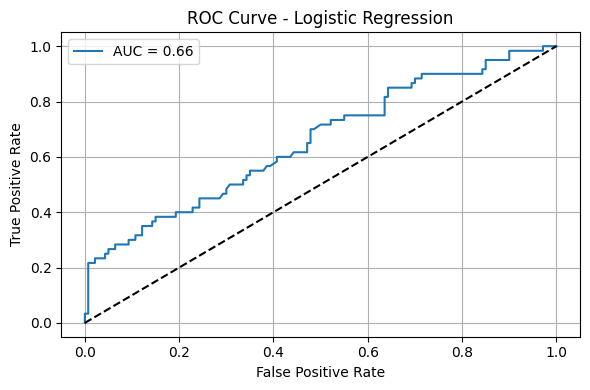


Logistic Regression Summary:
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: default          Pseudo R-squared: 0.076     
Date:               2025-05-04 16:00 AIC:              917.0392  
No. Observations:   800              BIC:              949.8315  
Df Model:           6                Log-Likelihood:   -451.52   
Df Residuals:       793              LL-Null:          -488.69   
Converged:          1.0000           LLR p-value:      5.2389e-14
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -1.0505   0.7744 -1.3566 0.1749 -2.5682  0.4673
term               0.0409   0.0068  6.0341 0.0000  0.0276  0.0542
age                0.0076   0.0207  0.3663 0.7142 -0.0330  0.0481
credit

In [ ]:
# 1. Load the model-ready dataset
df_model = pd.read_csv("german_model_features.csv")

# 2. Split into train/test sets
X = df_model.drop(columns=["default"])
y = df_model["default"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Add intercept term to features
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test, has_constant='add')

# 4. Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
logit_result = logit_model.fit()

# 5. Predict on test set
y_pred_prob = logit_result.predict(X_test_sm)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# 6. Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))
print(f"AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")

# 7. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Model Summary
print("\nLogistic Regression Summary:")
print(logit_result.summary2())


In [ ]:
# Feature importances from model
print(model.params.sort_values(ascending=False))


term                0.039625
age_credit_cards    0.004949
age                -0.022605
tax_echelon        -0.312449
salary             -0.365402
credit_cards       -0.379855
dtype: float64


## Random Forest

Random Forest:
[[114  27]
 [ 46  13]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       141
           1       0.33      0.22      0.26        59

    accuracy                           0.64       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.60      0.63      0.61       200



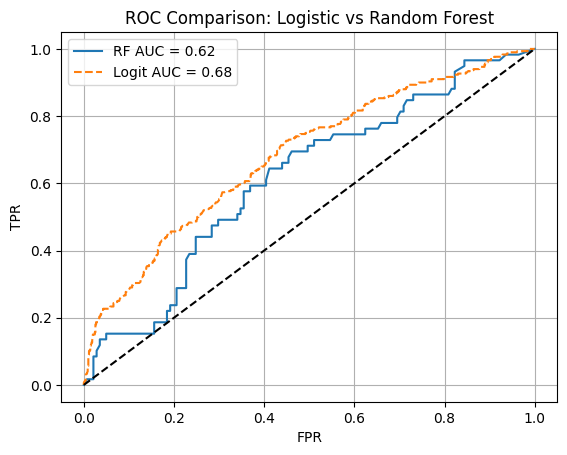

In [ ]:


# Split data
X_rf = df_model.drop(columns=["default", "pred_prob", "pred_class", "pred_class_opt"])
y_rf = df_model["default"]
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC = {roc_auc_score(y_test, y_prob_rf):.2f}")
plt.plot(fpr, tpr, label=f"Logit AUC = {roc_auc_score(y, df_model['pred_prob']):.2f}", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Comparison: Logistic vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# Split data
X = df_model.drop(columns=["default", "pred_prob", "pred_class"])
y = df_model["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest AUC: 0.6082461834355091
[[111  30]
 [ 45  14]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       141
           1       0.32      0.24      0.27        59

    accuracy                           0.62       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.60      0.62      0.61       200



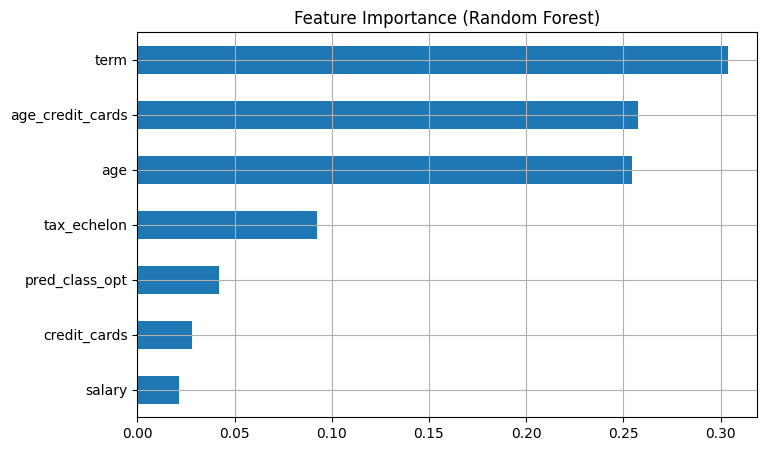

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()


In [ ]:
# Select only the columns used for logistic regression
features_used = ["term", "age", "credit_cards", "salary", "tax_echelon", "age_credit_cards"]
X_test_logit = sm.add_constant(X_test[features_used])  # ensure same columns

# Logistic Regression AUC (fix)
logit_auc = roc_auc_score(y_test, model.predict(X_test_logit))
print(f"Logistic Regression AUC: {logit_auc:.2f}")



Logistic Regression AUC: 0.73


Random Forest Confusion Matrix:
[[111  29]
 [ 36  24]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       140
           1       0.45      0.40      0.42        60

    accuracy                           0.68       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.66      0.68      0.67       200

Random Forest AUC: 0.60


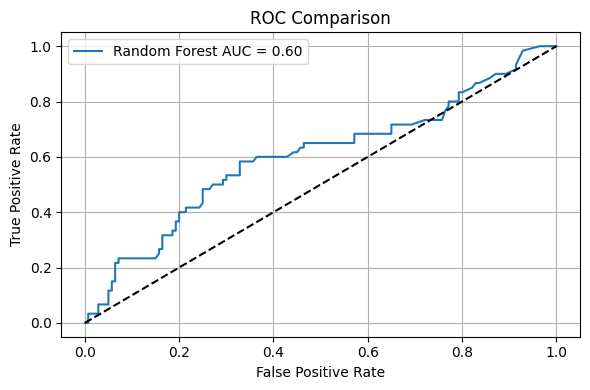

In [ ]:


# Train Random Forest on same training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = rf_model.predict(X_test)

# Evaluate
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_probs):.2f}")

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {roc_auc_score(y_test, rf_probs):.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Define buckets
df_score = pd.DataFrame({"prob": y_pred_prob})
df_score["score_band"] = pd.cut(
    df_score["prob"],
    bins=[0.0, 0.3, 0.5, 0.7, 1.0],
    labels=["Low", "Moderate", "High", "Very High"]
)

# Summary table
score_summary = df_score["score_band"].value_counts().sort_index()
print(score_summary)


score_band
Low          103
Moderate      74
High          21
Very High      2
Name: count, dtype: int64


## Decision Tree

In [ ]:


# Train model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)
y_pred_tree_prob = tree.predict_proba(X_test)[:, 1]

# Summary: tree depth and leaves
print(f"Decision Tree Depth: {tree.get_depth()}, Leaves: {tree.get_n_leaves()}")

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("AUC:", roc_auc_score(y_test, y_pred_tree_prob))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Log Loss:", log_loss(y_test, y_pred_tree_prob))
print("MSE:", mean_squared_error(y_test, y_pred_tree_prob))
print("Brier Score:", brier_score_loss(y_test, y_pred_tree_prob))
print("Pearson Corr:", pearsonr(y_test, y_pred_tree_prob)[0])


Decision Tree Depth: 21, Leaves: 297
Confusion Matrix:
 [[100  40]
 [ 39  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       140
           1       0.34      0.35      0.35        60

    accuracy                           0.60       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.61      0.60      0.61       200

AUC: 0.5776190476190475
Accuracy: 0.605
Log Loss: 11.977322700070157
MSE: 0.3602777777777778
Brier Score: 0.3602777777777778
Pearson Corr: 0.12769888365607343


<ipython-input-56-ac485e8c7624>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tree_importance, x="Importance", y="Feature", palette="Blues_d")


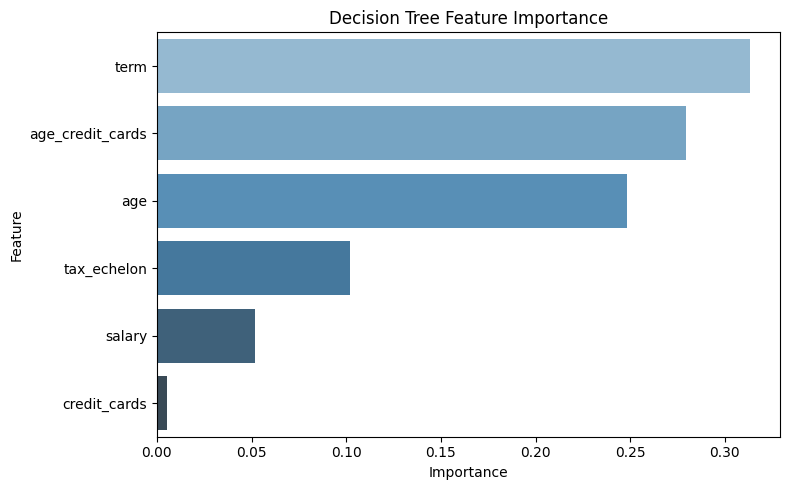

In [ ]:


# Create DataFrame for Decision Tree feature importance
tree_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=tree_importance, x="Importance", y="Feature", palette="Blues_d")
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()


## XG-Boost

In [ ]:


# Train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)[:, 1]

# Summary: print feature importances
print("XGBoost Feature Importances:")
print(pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False))

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_pred_xgb_prob))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Log Loss:", log_loss(y_test, y_pred_xgb_prob))
print("MSE:", mean_squared_error(y_test, y_pred_xgb_prob))
print("Brier Score:", brier_score_loss(y_test, y_pred_xgb_prob))
print("Pearson Corr:", pearsonr(y_test, y_pred_xgb_prob)[0])


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
tax_echelon         0.233206
salary              0.203749
term                0.178282
age_credit_cards    0.153129
age                 0.134584
credit_cards        0.097050
dtype: float32
Confusion Matrix:
 [[112  28]
 [ 34  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       140
           1       0.48      0.43      0.46        60

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.69      0.69       200

AUC: 0.6426190476190476
Accuracy: 0.69
Log Loss: 0.715791959969061
MSE: 0.22908149659633636
Brier Score: 0.22908149533990183
Pearson Corr: 0.24275614145349073


<ipython-input-57-374ed40d1fb0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance, x="Importance", y="Feature", palette="Greens_d")


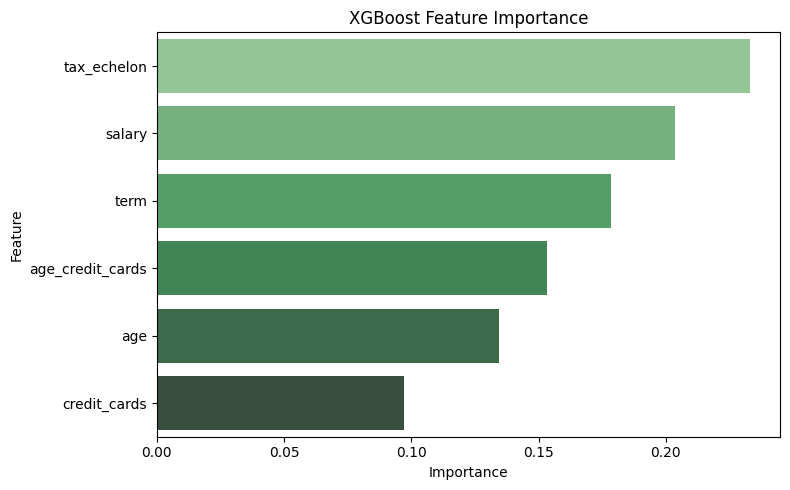

In [ ]:
# Create DataFrame for XGBoost feature importance
xgb_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=xgb_importance, x="Importance", y="Feature", palette="Greens_d")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


### Measurement metrics

In [ ]:


# Logistic Regression
y_pred_logit = (y_pred_logit_prob >= 0.5).astype(int)
logit_auc = roc_auc_score(y_test, y_pred_logit_prob)
logit_acc = accuracy_score(y_test, y_pred_logit)
logit_logloss = log_loss(y_test, y_pred_logit_prob)
logit_mse = mean_squared_error(y_test, y_pred_logit_prob)
logit_brier = brier_score_loss(y_test, y_pred_logit_prob)
logit_pearson = pearsonr(y_test, y_pred_logit_prob)[0]

# Decision Tree
y_pred_tree = tree.predict(X_test)
tree_auc = roc_auc_score(y_test, y_pred_tree_prob)
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_logloss = log_loss(y_test, y_pred_tree_prob)
tree_mse = mean_squared_error(y_test, y_pred_tree_prob)
tree_brier = brier_score_loss(y_test, y_pred_tree_prob)
tree_pearson = pearsonr(y_test, y_pred_tree_prob)[0]

# XGBoost
y_pred_xgb = xgb.predict(X_test)
xgb_auc = roc_auc_score(y_test, y_pred_xgb_prob)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_logloss = log_loss(y_test, y_pred_xgb_prob)
xgb_mse = mean_squared_error(y_test, y_pred_xgb_prob)
xgb_brier = brier_score_loss(y_test, y_pred_xgb_prob)
xgb_pearson = pearsonr(y_test, y_pred_xgb_prob)[0]


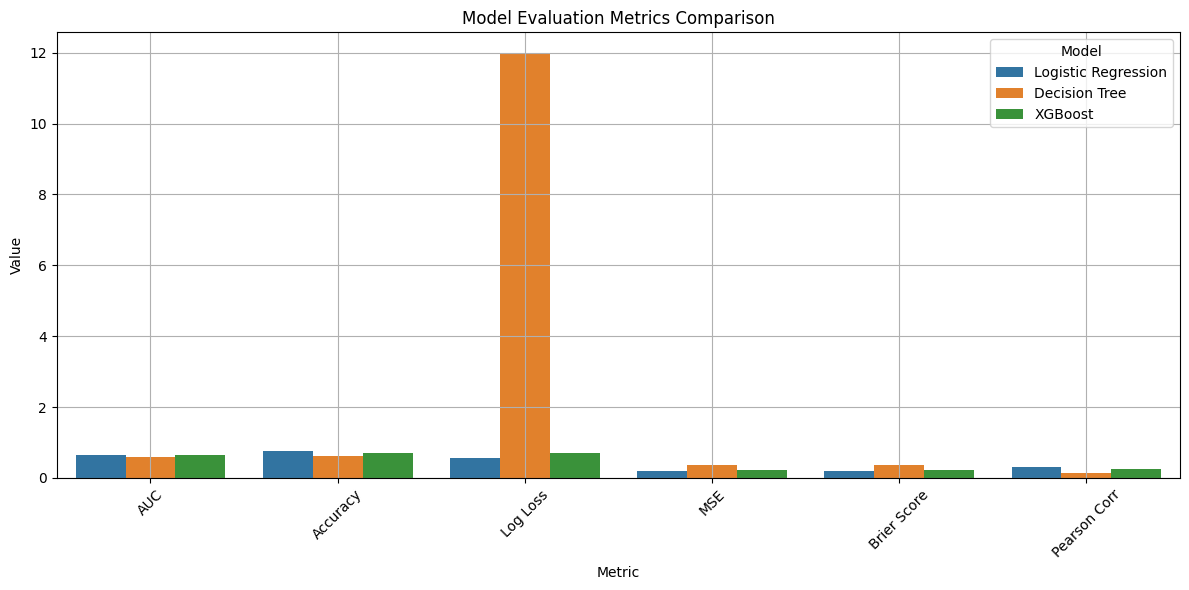

In [ ]:


# Reconstruct the metrics
metrics_plot_data = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "XGBoost"],
    "AUC": [logit_auc, tree_auc, xgb_auc],
    "Accuracy": [logit_acc, tree_acc, xgb_acc],
    "Log Loss": [logit_logloss, tree_logloss, xgb_logloss],
    "MSE": [logit_mse, tree_mse, xgb_mse],
    "Brier Score": [logit_brier, tree_brier, xgb_brier],
    "Pearson Corr": [logit_pearson, tree_pearson, xgb_pearson]
})

# Transform to long format
metrics_long = metrics_plot_data.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_long, x="Metric", y="Value", hue="Model")
plt.title("Model Evaluation Metrics Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


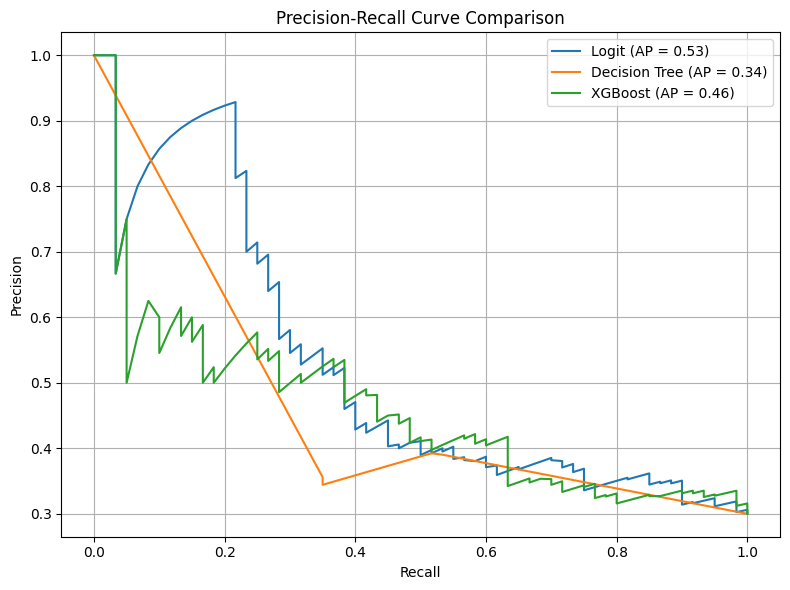

In [ ]:


# Precision-Recall for Logistic Regression
precision_logit, recall_logit, _ = precision_recall_curve(y_test, y_pred_logit_prob)
avg_precision_logit = average_precision_score(y_test, y_pred_logit_prob)

# Decision Tree
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_pred_tree_prob)
avg_precision_tree = average_precision_score(y_test, y_pred_tree_prob)

# XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb_prob)
avg_precision_xgb = average_precision_score(y_test, y_pred_xgb_prob)

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_logit, precision_logit, label=f"Logit (AP = {avg_precision_logit:.2f})")
plt.plot(recall_tree, precision_tree, label=f"Decision Tree (AP = {avg_precision_tree:.2f})")
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (AP = {avg_precision_xgb:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
